필요힌 파이썬 라이브러리를 임포트 한다. 

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report

CIFAR10 데이터 셋을 다운로딩 한다. 

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


다운로딩 데이터 이미지를 확인한다,

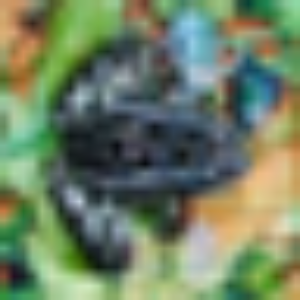

[6]


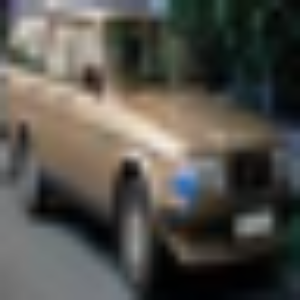

[1]


In [3]:
img = cv2.resize(trainX[200], (300, 300))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(trainY[200])
img = cv2.resize(trainX[201], (300, 300))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(trainY[201])

입력 데이터 이미지의 노말라이징을 실행한다.

In [4]:
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

입력 이미지 데이터를 flattening 한다. 

In [5]:
# Flattening: per a image 32*32*3 -> 1 * 3072
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

결과 데이터값을 바니아리징을 한다. 

In [6]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

다층퍼셉트론인 신경망 모델을 만든다.

In [7]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

신경망을 구성하고 트레이닝한다. 

In [8]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])

In [ ]:

H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=32)

Epoch 1/100
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8344 - accuracy: 0.3455 - val_loss: 1.7259 - val_accuracy: 0.3862
Epoch 2/100
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6484 - accuracy: 0.4174 - val_loss: 1.5843 - val_accuracy: 0.4449
Epoch 3/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5677 - accuracy: 0.4447 - val_loss: 1.6001 - val_accuracy: 0.4241
Epoch 4/100
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5105 - accuracy: 0.4670 - val_loss: 1.5291 - val_accuracy: 0.4601
Epoch 5/100
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4642 - accuracy: 0.4850 - val_loss: 1.4902 - val_accuracy: 0.4710
Epoch 6/100
1563/1563 [==============================] - 38s 25ms/step - loss: 1.4207 - accuracy: 0.5018 - val_loss: 1.5320 - val_accuracy: 0.4550
Epoch 7/100
1563/1563 [==============================] - 48s 30ms/step - loss: 1.3878 - accuracy: 0.5102 - val_loss: 1

신경망 트레이닝 결과를 확인한다.

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))


신경망 트레이닝 결과를 그래프로 확인한다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("plot.png")